As the first step in the analysis, I import the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

Next, I load the dataset as a pandas dataframe and take a look at the first 5 rows to see the columns that are available.

In [2]:
#load in data
data = pd.read_csv("datasets\weightlifting\WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv")
pd.set_option('display.max_columns', None)
data.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,end_of_exercise,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,target
0,eurico,1322489729,34670,no,3.70,41.6,-82.8,3,2.02,0.18,0.02,-3,-18,22,387,525,-267,132.0,-43.7,-53.6,38,2.65,-0.61,-0.02,143,30,-346,556,-205,-374,51.235540,11.698847,104.264727,4,-0.31,0.16,0.08,5,21,37,-471.0,191.0,277.0,-111.0,26.5,138.0,30,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,eurico,1322489729,62641,no,3.66,42.8,-82.5,2,1.96,0.14,0.05,-2,-13,16,405,512,-254,129.0,-45.3,-49.0,38,2.79,-0.64,-0.11,146,35,-339,599,-206,-335,55.824418,9.645819,100.228053,4,-0.31,0.14,0.07,4,22,35,-472.0,184.0,281.0,-112.0,26.2,138.0,31,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0,E
2,eurico,1322489729,70653,no,3.58,43.7,-82.3,1,1.88,0.08,0.05,-2,-6,8,409,511,-244,125.0,-46.8,-43.7,35,2.91,-0.69,-0.15,156,44,-307,613,-198,-319,55.469831,6.875244,101.084106,4,-0.31,0.16,0.05,3,23,37,-468.0,190.0,275.0,-114.0,26.0,137.0,32,-0.05,-0.27,-0.72,-182.0,172.0,185,-1130.0,1400.0,-863.0,E
3,eurico,1322489729,82654,no,3.56,44.4,-82.1,1,1.80,0.03,0.08,-6,-5,7,422,513,-221,120.0,-48.1,-38.1,35,3.08,-0.72,-0.23,158,52,-305,646,-186,-268,55.944860,11.079297,99.784556,5,-0.31,0.16,0.07,5,24,38,-469.0,184.0,285.0,-115.0,25.8,137.0,33,0.02,-0.24,-0.79,-185.0,182.0,188,-1120.0,1400.0,-855.0,E
4,eurico,1322489729,90637,no,3.57,45.1,-81.9,1,1.77,0.00,0.13,-4,-9,0,418,508,-208,115.0,-49.1,-31.7,34,3.20,-0.77,-0.25,163,55,-288,670,-175,-241,55.211739,11.426833,100.422583,4,-0.31,0.14,0.07,5,23,37,-468.0,189.0,292.0,-117.0,25.5,137.0,34,0.08,-0.27,-0.82,-188.0,195.0,188,-1100.0,1400.0,-843.0,E


It appears that the raw_timestamp columns are in unix time which should be converted to a regular timestamp with microseconds. Other columns seem to make sense. Next, I check whether any colums have null values in them which will have to be addressed:

In [3]:
#check null values
data.isnull().sum()

user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
end_of_exercise         0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           1
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbell_z        0
accel_dumbbell_x        0
accel_dumbbe

The only column containing a null value is roll_dumbbell which I will later have to impute. I now check for whether any rows are duplicated:

In [4]:
#check duplicated rows
data.duplicated().sum()

0

Luckily, there are no duplicated rows and I move on to check the datatypes of the dataset:

In [5]:
#check variable types
data.dtypes

user_name                object
raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
end_of_exercise          object
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_arm_z              int64
roll_dumbbell           float64
pitch_du

Most of the columns are numeric, with the exception of user_name, end_of_exercise, and target. I proceed to convert the two unix time columns into a single timestamp column:

In [6]:
#create proper timestamp column from epoch columns
data["concat_date"] = (data['raw_timestamp_part_1'].astype(str) + '.' + data['raw_timestamp_part_2'].astype(str))
data['concat_date_float'] = data["concat_date"].astype(float)
data['timestamp'] = ''
for index, row in data.iterrows():
    data['timestamp'][index] = datetime.fromtimestamp(data["concat_date_float"][index]).strftime("%Y-%m-%d %H:%M:%S:%f")
data['timestamp'] = pd.to_datetime(data['timestamp'], format="%Y-%m-%d %H:%M:%S:%f")
data[['raw_timestamp_part_1','raw_timestamp_part_2','timestamp']]


,raw_timestamp_part_1,raw_timestamp_part_2,timestamp
0,1322489729,34670,2011-11-28 09:15:29.346700
1,1322489729,62641,2011-11-28 09:15:29.626410
2,1322489729,70653,2011-11-28 09:15:29.706530
3,1322489729,82654,2011-11-28 09:15:29.826540
4,1322489729,90637,2011-11-28 09:15:29.906370
...,...,...,...
39237,1322832937,596287,2011-12-02 08:35:37.596287
39238,1322832937,636283,2011-12-02 08:35:37.636283
39239,1322832937,672400,2011-12-02 08:35:37.672400
39240,1322832937,964299,2011-12-02 08:35:37.964299


At this point, it makes more sense to engineer a column containing the time since each repetition starts, as that may be more valuable to properly classifying the performance of an exercise rather than a datetime. For example, the sensor readings that are consistent with one exercise class 100ms into the repetition may actually be from another class if the user is 500ms in. I sort the data by timestamp and use the user_name, timestamp, and end of exercise columns to engineer this feature. One particular difficulty I run into is having to account for the fact that each exercise does not always have an end_of_exercise = 'yes' after sorting the data by timestamp. For example, one user may be performing his last exercise at 9:50AM on Nov 30th with the end_of_exercise column = 'no' being the final row value before the dataset jumps to the next user starting his exercise the following day. Similarly, sometimes the same user may start his next set of exercises after a certain time interval, such as an entire day, without seemingly finishing the previous exercise. This may be due to the sensors failing to properly capture the end of the exercise or missing data. I account for both of these issues in engineering the feature. As the first step I assign an exercise number to each repetition:

In [7]:
#order by date in order to prepare for making an exercise number column for each repetition of an exercise
data.sort_values(by='concat_date_float', inplace=True, ascending=True)

#create exercise number column (for ex: each time Pedro gets to the end of an exercise, that exercise ends and a new one begins)
data["exercise"] = ''
data["time_difference"] =''
last_user_name =  data['user_name'].values[0]
last_timestamp = data['timestamp'].values[0]
end_of_exercise = data['end_of_exercise'].values[0]
i = 1
for index, row in data.iterrows():
    time_difference = (data['timestamp'][index] - last_timestamp).total_seconds()
    if data['end_of_exercise'][index] == "no" and data['user_name'][index]==last_user_name and time_difference < 2:
        data["exercise"][index] = i
        last_user_name = data['user_name'][index]
        last_timestamp = data['timestamp'][index]
        end_of_exercise = data['end_of_exercise'][index]
        data["time_difference"][index] = time_difference
    elif data['end_of_exercise'][index] == "yes" and data['user_name'][index]==last_user_name and time_difference < 2:
        data["exercise"][index] = i
        last_user_name = data['user_name'][index]
        last_timestamp = data['timestamp'][index]
        end_of_exercise = data['end_of_exercise'][index]
        data["time_difference"][index] = time_difference
        i += 1
    elif data['user_name'][index]==last_user_name and time_difference > 2 and end_of_exercise=="yes":
        data["exercise"][index] = i
        last_user_name = data['user_name'][index]
        last_timestamp = data['timestamp'][index]
        end_of_exercise = data['end_of_exercise'][index]
        data["time_difference"][index] = time_difference
        i += 1
    elif data['user_name'][index]==last_user_name and time_difference > 2 and end_of_exercise=="no":
        data["exercise"][index] = i + 1
        last_user_name = data['user_name'][index]
        last_timestamp = data['timestamp'][index]
        end_of_exercise = data['end_of_exercise'][index]
        data["time_difference"][index] = time_difference
        i += 1
    elif data['user_name'][index]!=last_user_name and end_of_exercise=="yes":
        data["exercise"][index] = i
        last_user_name = data['user_name'][index]
        last_timestamp = data['timestamp'][index]
        end_of_exercise = data['end_of_exercise'][index]
        data["time_difference"][index] = time_difference
        i += 1
    elif data['user_name'][index]!=last_user_name and end_of_exercise=="no":
        data["exercise"][index] = i + 1
        last_user_name = data['user_name'][index]
        last_timestamp = data['timestamp'][index]
        end_of_exercise = data['end_of_exercise'][index]
        data["time_difference"][index] = time_difference
        i += 1

data[['user_name','timestamp','end_of_exercise','exercise']]

,user_name,timestamp,end_of_exercise,exercise
28764,eurico,2011-11-28 09:13:25.690639,no,1
28765,eurico,2011-11-28 09:13:25.722668,no,1
28766,eurico,2011-11-28 09:13:25.730661,no,1
28767,eurico,2011-11-28 09:13:25.734802,no,1
28768,eurico,2011-11-28 09:13:25.758636,no,1
...,...,...,...,...
28760,pedro,2011-12-05 09:24:41.528303,no,844
28761,pedro,2011-12-05 09:24:41.528333,no,844
28762,pedro,2011-12-05 09:24:41.536279,no,844
28763,pedro,2011-12-05 09:24:41.568296,yes,844


After labeling each repetition of an exercise with a number in the exercise column, I calculate the exercise_time column which tells us how far along the user is in his repetition of an exercise:

In [8]:
#creates exercise time column, which captures the time from the beginning for each observation/sensor reading
data['exercise_start'] = ''

start_time = 0
i = 0
for index, row in data.iterrows():
    if data['exercise'][index] == i+1:
        i += 1 
        #data['exercise_start'][index] = data['timestamp'][index]
        start_time = data['timestamp'][index]
        #start_time = pd.to_datetime(start_time, format="%Y-%m-%d %H:%M:%S:%f")
    data['exercise_start'][index] = start_time

data['exercise_start'] = pd.to_datetime(data['exercise_start'], format="%Y-%m-%d %H:%M:%S:%f")
data['exercise_time'] = ''
data['exercise_time'] = data['timestamp'] - data['exercise_start']
for index, row in data.iterrows():
    data['exercise_time'][index] = data['exercise_time'][index].total_seconds() 
data['exercise_time'] = data["exercise_time"].astype(float)
data[['user_name','timestamp','end_of_exercise','exercise','exercise_time']]

,user_name,timestamp,end_of_exercise,exercise,exercise_time
28764,eurico,2011-11-28 09:13:25.690639,no,1,0.000000
28765,eurico,2011-11-28 09:13:25.722668,no,1,0.032029
28766,eurico,2011-11-28 09:13:25.730661,no,1,0.040022
28767,eurico,2011-11-28 09:13:25.734802,no,1,0.044163
28768,eurico,2011-11-28 09:13:25.758636,no,1,0.067997
...,...,...,...,...,...
28760,pedro,2011-12-05 09:24:41.528303,no,844,0.423989
28761,pedro,2011-12-05 09:24:41.528333,no,844,0.424019
28762,pedro,2011-12-05 09:24:41.536279,no,844,0.431965
28763,pedro,2011-12-05 09:24:41.568296,yes,844,0.463982


The exercise_time feature is complete and I choose to drop the raw_timestamp, user_name, end_of_exercise and some additional columns used in calculating the exercise_time. This leads to a dataset containing solely numeric predictor variables and allows the use of classification techniques such as Linear Discriminant Analysis and K Nearest Neighbors which require all predictor variables to be numeric/continuous.

In [9]:
#keep only the columns we will need
clean_data = data.drop(['raw_timestamp_part_1','raw_timestamp_part_2','concat_date','concat_date_float','time_difference',
                       'timestamp','exercise_start','exercise','user_name','end_of_exercise'], axis=1)

In [10]:
#let's see the final dataframe
clean_data

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,target,exercise_time
28764,1.35,5.71,-87.6,3,0.02,0.00,-0.03,-12,4,30,68,573,-421,63.10,0.35,82.7,15,-0.95,-0.79,-0.30,-54,130,-23,106,-110,683,13.303863,-57.186093,97.976647,38,0.02,0.00,0.02,-204,50,313,-430.0,221.0,316.0,-123.0,-53.10,56.4,36,0.13,-0.88,0.16,-44.0,280.0,216,-356.0,910.0,-301.0,A,0.000000
28765,1.34,5.70,-87.6,3,0.00,0.00,-0.03,-11,4,29,68,578,-413,62.70,0.99,81.3,14,-0.87,-0.83,-0.21,-51,126,-23,122,-117,687,13.255340,-57.267098,97.910725,39,0.00,0.00,0.02,-205,50,314,-439.0,227.0,321.0,-124.0,-54.10,57.0,36,0.10,-0.85,0.03,-34.0,279.0,219,-367.0,922.0,-294.0,A,0.032029
28766,1.33,5.68,-87.6,3,0.00,0.00,-0.03,-10,3,29,66,576,-421,62.40,1.72,79.9,14,-0.82,-0.88,-0.10,-54,123,-25,139,-113,684,13.506826,-56.881239,98.218213,39,0.00,0.00,0.02,-204,51,315,-433.0,223.0,313.0,-125.0,-55.00,57.6,37,0.05,-0.80,-0.03,-42.0,287.0,221,-376.0,927.0,-301.0,A,0.040022
28767,1.31,5.67,-87.6,3,0.02,0.00,-0.03,-11,4,29,75,576,-423,62.00,2.66,78.3,15,-0.80,-0.93,-0.10,-57,129,-29,146,-122,677,14.020331,-57.419327,97.538854,39,0.00,0.00,0.02,-206,53,314,-425.0,226.0,307.0,-125.0,-55.60,58.0,38,0.03,-0.63,0.02,-55.0,294.0,226,-371.0,918.0,-292.0,A,0.044163
28768,1.30,5.67,-87.6,3,0.02,0.00,-0.03,-11,4,29,74,581,-414,61.50,3.45,76.9,14,-0.82,-0.96,-0.21,-56,125,-20,177,-110,672,14.020331,-57.419327,97.538854,39,-0.02,0.00,0.03,-206,53,314,-427.0,228.0,312.0,-125.0,-56.30,58.2,38,0.11,-0.55,0.10,-46.0,287.0,225,-387.0,919.0,-278.0,A,0.067997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28760,135.00,26.40,13.6,22,-0.43,-0.02,-0.43,-39,68,-202,-2,556,-433,6.33,-4.35,-73.3,5,0.10,-0.42,-0.21,20,9,40,-276,404,476,45.540948,57.295340,79.805907,10,-0.16,-1.57,0.49,53,43,70,563.0,-481.0,-66.0,148.0,12.00,99.3,32,0.02,-0.11,-0.11,121.0,238.0,-161,-235.0,790.0,788.0,E,0.423989
28761,135.00,26.30,13.6,22,-0.42,-0.03,-0.43,-43,67,-200,2,546,-428,5.94,-4.26,-75.0,3,0.14,-0.43,-0.20,15,2,30,-284,408,483,-30.050464,8.467322,125.786701,10,-0.19,-1.36,0.79,8,-28,90,569.0,-462.0,-68.0,148.0,12.20,99.5,33,0.03,-0.14,-0.16,133.0,242.0,-165,-240.0,796.0,784.0,E,0.424019
28762,135.00,26.20,13.6,22,-0.40,-0.02,-0.43,-47,70,-200,8,552,-428,5.47,-4.11,-76.8,3,0.18,-0.47,-0.18,12,3,29,-290,394,484,-37.099657,-11.810128,117.969077,11,-0.22,-0.96,0.95,-13,-40,102,582.0,-443.0,-62.0,148.0,12.30,99.7,31,0.10,-0.10,-0.20,122.0,230.0,-163,-239.0,790.0,786.0,E,0.431965
28763,135.00,26.10,13.6,22,-0.42,-0.02,-0.46,-49,72,-201,5,551,-422,5.08,-3.90,-78.5,4,0.21,-0.50,-0.15,17,8,35,-307,391,487,-28.800000,1.000000,128.300000,10,-0.13,-0.63,0.87,1,-29,98,592.0,-439.0,-60.0,148.0,12.40,99.8,31,0.06,-0.02,-0.18,119.0,224.0,-166,-238.0,784.0,805.0,E,0.463982


In [11]:
#save clean csv file
#clean_data.to_csv('clean_data.csv')

Next, I check for whether the classes are balanced, meaning, does each class have a similar number of observations?

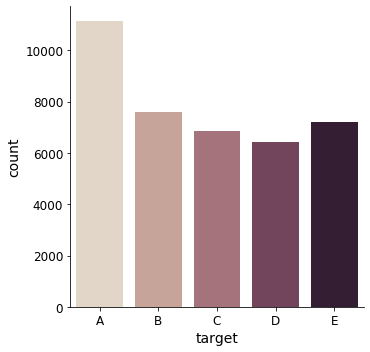

In [12]:
#check class balance
sns.catplot(x="target", kind="count", palette="ch:.25", data=clean_data);

It does look like class A is overrepresented which may lead to issues. It may be a good idea to even out the class using undersampling and oversampling techniques but I do not do so here at this point. The classes are close enough to being balanced, and I do employ stratified sampling to keep the class ratios consistent when I divide the full dataset into a training and test sets later on. Next, I take a look at the summary statistics of the predictor variables:

In [13]:
#summary statistics
clean_data.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,exercise_time
count,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39241.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.00000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000
mean,64.928120,0.423624,-10.827983,11.378982,-0.006643,0.040104,-0.131533,-5.680954,30.459125,-73.351027,55.718185,593.863768,-345.204577,17.505409,-4.301044,-0.906408,25.503873,0.052182,-0.261834,0.272748,-61.766143,32.610774,-69.612303,187.107997,159.197900,310.713521,23.908990,-10.819905,1.298639,13.764971,0.167300,0.043662,-0.138068,-28.797334,52.969115,-38.46068,-326.934041,220.321576,44.901186,33.751627,11.077626,18.876811,34.676112,0.146381,0.095838,0.147643,-63.954814,162.981005,-55.494751,-316.640326,379.762296,395.010309,0.437012
std,62.672987,22.400539,94.982455,7.732219,0.207560,0.078789,0.239324,29.686483,28.651538,100.421528,64.612256,35.479501,64.731109,72.754832,30.650922,71.658473,10.465212,1.985466,0.848307,0.551042,182.276740,109.739729,134.065821,442.964788,201.027421,324.955637,69.962704,37.116422,82.465101,10.255157,1.101089,0.549446,1.632731,67.673645,80.853690,109.69346,341.519275,327.300612,139.838061,107.963941,28.203015,103.468566,10.088146,1.827178,3.735124,1.337704,180.940999,199.580505,137.692832,345.893844,507.055260,368.098954,0.265016
min,-28.900000,-56.200000,-180.000000,0.000000,-1.060000,-0.640000,-1.570000,-120.000000,-71.000000,-280.000000,-55.000000,353.000000,-627.000000,-180.000000,-89.100000,-180.000000,0.000000,-6.370000,-3.480000,-2.330000,-428.000000,-318.000000,-640.000000,-584.000000,-392.000000,-597.000000,-154.139304,-149.593648,-153.713729,0.000000,-204.000000,-2.120000,-2.380000,-419.000000,-189.000000,-334.00000,-643.000000,-3600.000000,-262.000000,-180.000000,-72.500000,-180.000000,0.000000,-339.000000,-7.030000,-52.000000,-498.000000,-690.000000,-458.000000,-1280.000000,-906.000000,-973.000000,0.000000
25%,1.100000,1.830000,-88.200000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,9.000000,582.000000,-375.000000,-32.500000,-25.500000,-43.600000,17.000000,-1.300000,-0.800000,-0.070000,-243.000000,-53.000000,-140.000000,-302.000000,-2.000000,141.000000,-17.936064,-41.128696,-77.556808,4.000000,-0.030000,-0.140000,-0.310000,-51.000000,-8.000000,-142.00000,-535.000000,230.000000,-47.000000,-2.015000,0.000000,-70.100000,29.000000,-0.220000,-1.450000,-0.180000,-181.000000,53.000000,-181.000000,-620.000000,8.000000,200.000000,0.212079
50%,114.000000,5.320000,-11.900000,17.000000,0.030000,0.020000,-0.110000,-15.000000,37.000000,-153.000000,35.000000,601.000000,-320.000000,0.000000,0.000000,0.000000,27.000000,0.100000,-0.260000,0.250000,-47.000000,13.000000,-45.000000,277.000000,207.000000,448.000000,48.323120,-21.186290,-4.725687,10

In addition to getting a feel for summary statistics such as mean and standard deviation of each variable, I'm looking for particularly large or small values that may be outliers. Given my lack of familiarity with each individual predictor, I cannot judge whether anything looks improper. The distributions of the numeric variables seem reasonable enough to me. I move on to plot each variable's distribution:

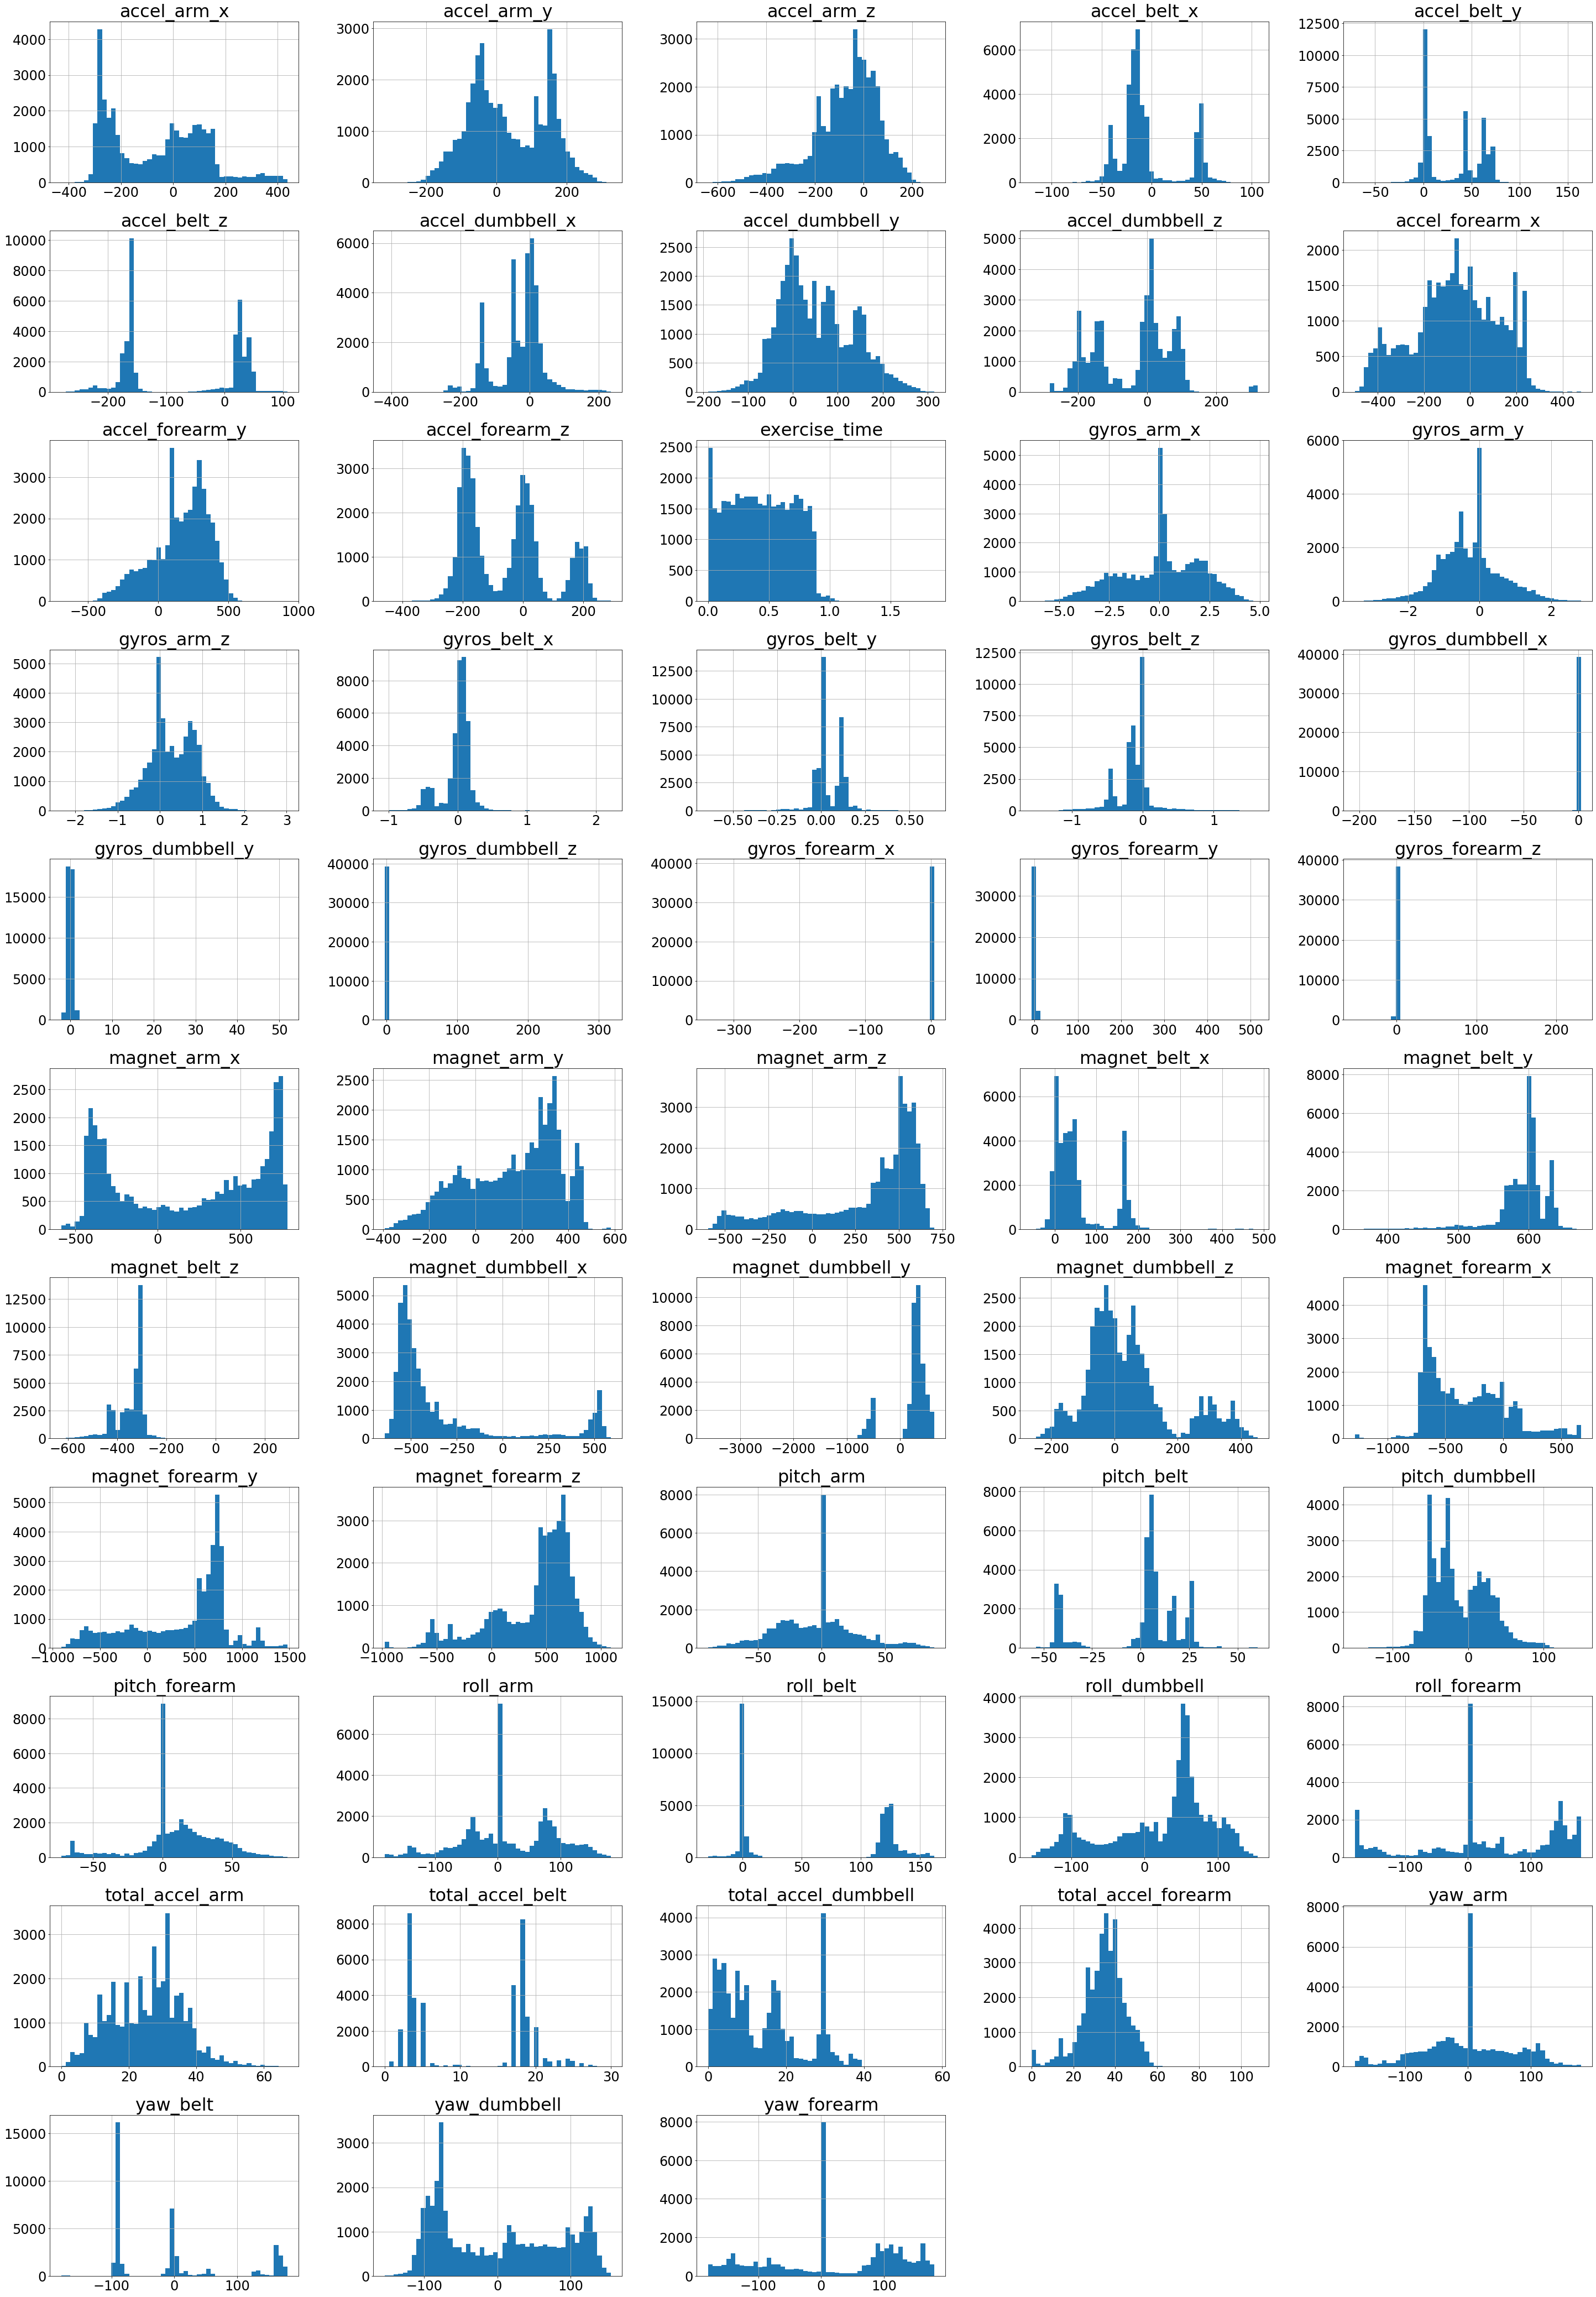

In [14]:
#variable variation plots
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
mpl.rcParams.update(params)
clean_data.hist(bins=50, figsize=(50,75), layout=(11,5))
plt.show()

A lot of the variables don't look normally distributed therefore Linear Discriminant Analysis, which requires normality of predictors, probably won't work as well as it could. It also looks like some distributions have multiple peaks, which is often caused by different classes having different distributions. I take a closer look at a couple of the variables: accel_forearm_z and roll_belt to see if they may be separating the classes well:

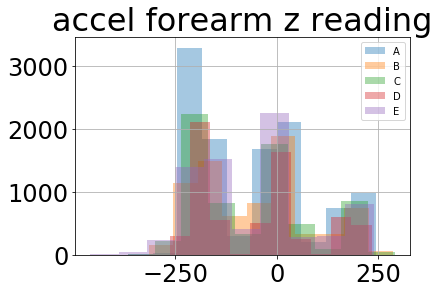

In [15]:
#most variables do not look normal, explore a couple of the peaky plots to see if exercise classes have anything to do with it
clean_data.groupby("target").accel_forearm_z.hist(alpha=0.4)
plt.title('accel forearm z reading')
plt.legend( ['A', 'B', 'C','D','E'])

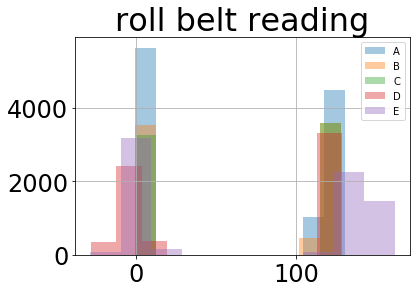

In [16]:
clean_data.groupby("target").roll_belt.hist(alpha=0.4)
plt.title('roll belt reading')
plt.legend( ['A', 'B', 'C','D','E'])

The peaks do not clearly differentiate between classes as observations from each class are a part of each peak. It's hard to say from these graphs whether these two predictors will be valuable. I move on to check the correlations in the dataset:

In [17]:
#look at correlations between predictors
corr = clean_data.corr()
corr

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,exercise_time
roll_belt,1.000000,-0.210052,0.813751,0.981320,-0.119895,0.463566,-0.465435,0.251533,0.925150,-0.992095,0.343831,-0.215758,-0.066774,-0.368334,0.061534,-0.228461,-0.278574,0.027011,-0.226952,0.548018,0.225460,-0.795931,0.394586,0.082295,0.013351,0.028873,-0.126768,0.074184,0.038649,-0.204403,0.008752,0.059277,0.008951,0.229542,-0.268629,0.113794,0.314587,-0.285486,-0.500845,-0.153295,0.171538,-0.274237,0.066665,0.128678,0.045454,0.036114,-0.482898,0.022756,0.081497,-0.185214,0.024929,0.266132,-0.012895
pitch_belt,-0.210052,1.000000,-0.699421,-0.131613,-0.429543,-0.396545,-0.113444,-0.964498,0.088401,0.155045,-0.877498,-0.089290,-0.139227,0.169391,-0.166811,0.154018,0.093982,-0.045853,0.102918,-0.311736,0.200420,0.219450,0.046712,-0.040847,0.045383,-0.002766,-0.351864,0.231893,0.659590,-0.320047,0.017922,-0.026611,-0.010894,0.164654,-0.453376,0.536702,0.458457,-0.365522,-0.262676,0.143030,0.258305,0.044011,-0.332640,-0.195453,-0.052460,-0.128511,0.121496,-0.365088,-0.225751,-0.075973,-0.016855,-0.061193,-0.004020
yaw_belt,0.813751,-0.699421,1.000000,0.759544,0.143037,0.529602,-0.276482,0.709181,0.596837,-0.774405,0.728231,-0.059184,0.093115,-0.333138,0.141563,-0.234581,-0.243538,0.040955,-0.213250,0.552414,0.056101,-0.677194,0.252421,0.077599,-0.012332,0.022430,0.098807,-0.087414,-0.340345,0.039125,0.000618,0.044612,0.010754,0.055681,0.053634,-0.224568,-0.026661,-0.029666,-0.212304,-0.182289,-0.036305,-0.199231,0.230447,0.202838,0.063522,0.098358,-0.388809,0.235962,0.169529,-0.083078,0.041494,0.222226,-0.008287
total_accel_belt,0.981320,-0.131613,0.759544,1.000000,-0.168871,0.408497,-0.483519,0.165789,0.928656,-0.975922,0.278067,-0.216992,-0.058035,-0.358175,0.055123,-0.211127,-0.267940,0.018513,-0.214865,0.510947,0.246119,-0.759611,0.401528,0.075258,0.038992,0.027301,-0.133009,0.069591,0.074578,-0.184501,0.027602,0.052778,0.001713,0.201110,-0.268810,0.122477,0.366962,-0.335532,-0.517117,-0.116145,0.183420,-0.247226,0.033299,0.116778,0.037313,0.021737,-0.446606,0.010292,0.042658,-0.181201,0.034938,0.290937,-0.014210
gyros_belt_x,-0.119895,-0.429543,0.143037,-0.168871,1.000000,0.327441,0.343432,0.468413,-0.272760,0.153270,0.421123,0.113154,0.234268,-0.247134,-0.030515,-0.153045,0.001093,0.068837,-0.048963,0.284329,-0.381410,-0.079261,-0.266929,0.017676,-0.135487,-0.013974,0.250000,-0.200090,-0.438256,0.065778,-0.099911,0.132289,0.029748,-0.138743,0.296460,-0.352871,-0.745578,0.782249,0.223435,-0.218205,-0.157415,-0.177053,0.050619,0.040631,0.022907,0.023797,-0.212519,-0.049367,0.343373,0.053450,0.015863,-0.114482,-0.012138
gyros_belt_y,0.463566,-0.396545,0.529602,0.408497,0.327441,1.000000,0.329967,0.448418,0.330335,-0.434626,0.403785,0.044600,0.116613,-0.368464,0.008073,-0.232441,-0.151490,0.073644,-0.150694,0.493656,-0.135464,-0.494291,0.045706,0.067565,-0.084289,0.016566,0.068896,-0.127032,-0.289904,-0.073392,-0.033243,0.039691,0.016279,0.021404,0.045664,-0.180769,-0.344784,0.379632,-0.161815,-0.227288,-0.026619,-0.267431,0.069641,0.110871,-0.019347,0.023260,-0.375324,-0.013956,0.267680,-0.025653,0.013808,0.111286,0.002130
gyros_belt_z,-0.465435,-0.113444,-0.276482,-0.483519,0.343432,0.329967,1.000000,0.125102,-0.513592,0.476958,0.028780,0.123649,0.072780,0.033148,-0.031449,0.018

The above table is hard to read due to the large number of predictors but it does seem like we are dealing with lots of correlated variables. I pick out a few high correlation variables from the table above and graph them:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216D73165C0>,
      dtype=object)

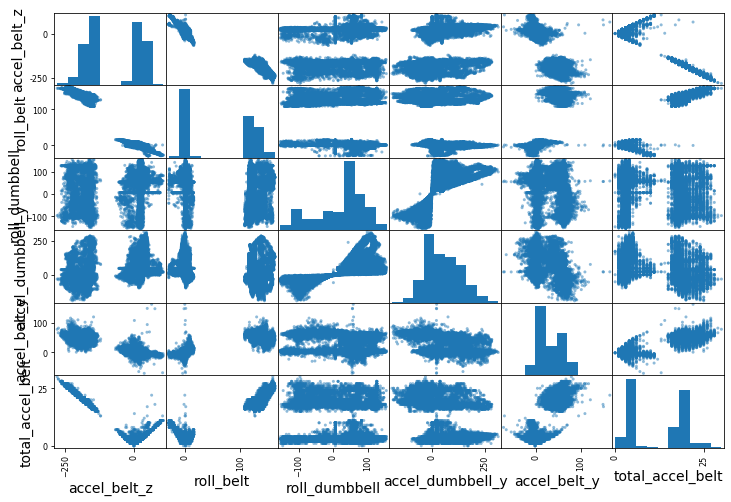

In [18]:
#graph highly correlated predictors for a better look at their covariation
attributes = ['accel_belt_z','roll_belt','roll_dumbbell','accel_dumbbell_y',
             'accel_belt_y','total_accel_belt']
scatter_matrix(clean_data[attributes],figsize=(12,8))

Certain variables, such as accel_dumbbell_y and roll_dumbell, as well as total_accel_belt and accel_belt_y are clearly correlated, which we could've even been able to tell by the variable names themselves since accel_belt_y could very well make up the total_accel_belt variable alongside accel_belt_z and accel_belt_x variables. I next check the entire correlation matrix:

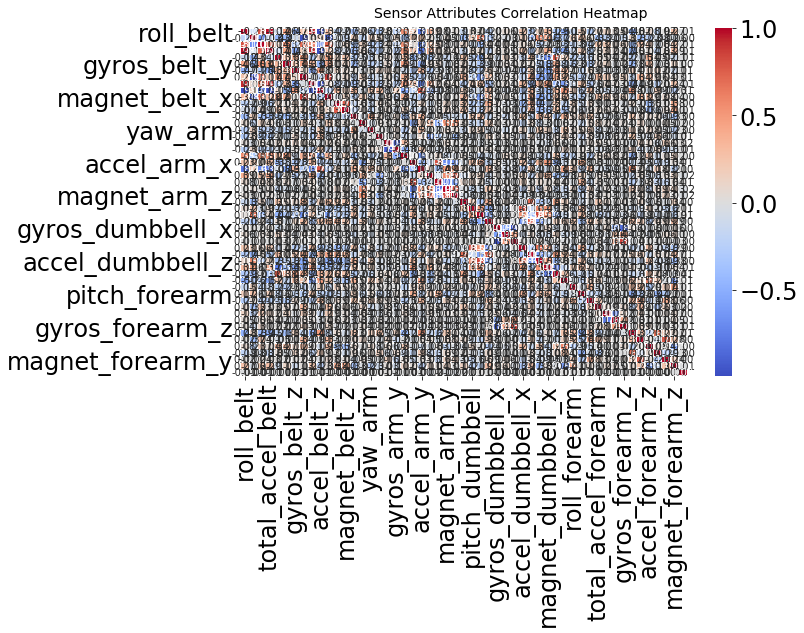

In [19]:
# Let's look at the entire Correlation Matrix Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 6))
corr = clean_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Sensor Attributes Correlation Heatmap', fontsize=14)

In an ideal low correlation scenario, we are looking for just the diagonals being red with everything else being colorless. Here, we can see clusters of red and blue boxes, meaning high positive and negative correlations. Clearly, we are dealing with a highly correlated dataset which further points out that we may be forced to resort to non parametric methods. Alternatively, we could look into orthogonalizing our data using Princiapl Component Analysis or employing large amounts of regularization. Next I take a look at a few variables to see if they may be predictive of the outcome variable:

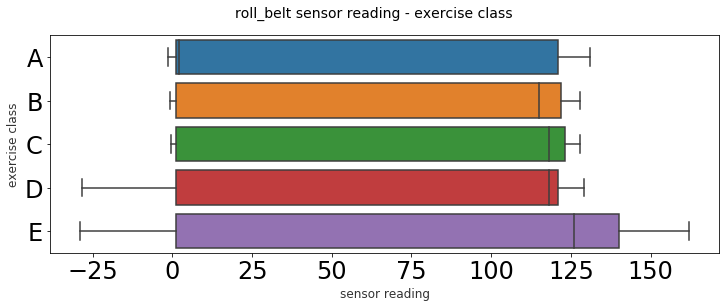

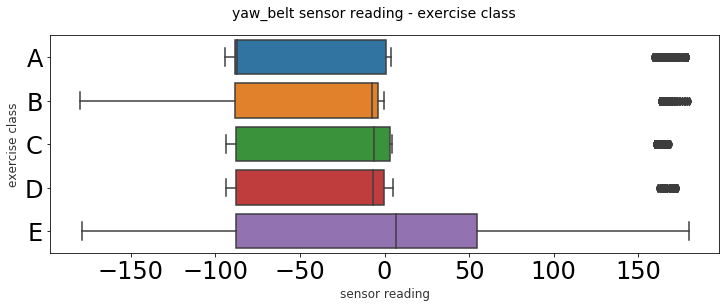

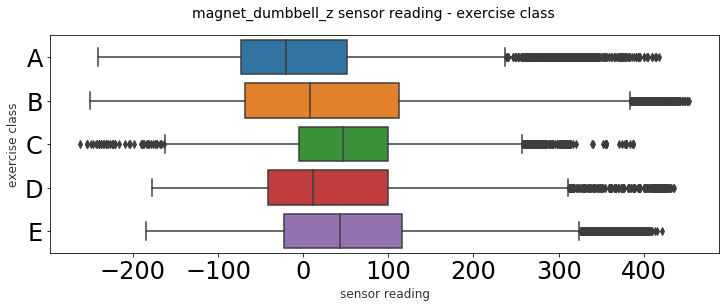

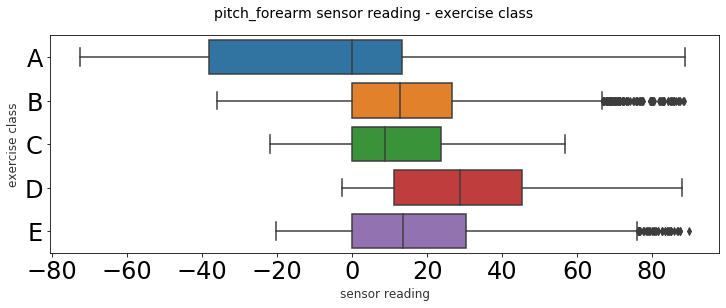

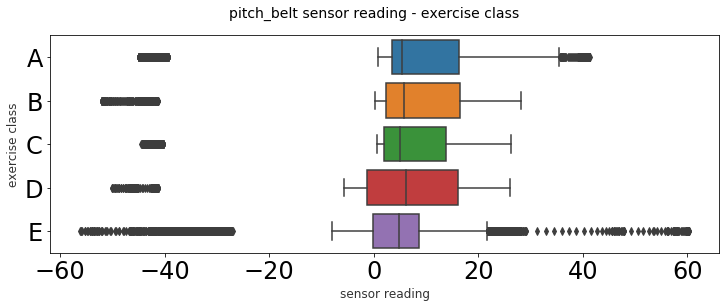

In [20]:
# Let's take a look at boxplots of some variables against their exercie classes to see if some variables could be predictive
attributes = ['roll_belt','yaw_belt','magnet_dumbbell_z','pitch_forearm','pitch_belt']

for element in attributes:
    f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
    f.suptitle('{} sensor reading - exercise class'.format(element), fontsize=14)
    sns.boxplot(x=element, y="target", data=clean_data,  ax=ax)
    ax.set_xlabel("sensor reading",size = 12,alpha=0.8)
    ax.set_ylabel("exercise class",size = 12,alpha=0.8)

It does look like some variables, such as row_belt, yaw_belt and pitch_forearm may help us differentiate between classes. At this point, the Exploratory Data Analysis is complete and I move on to setting up the training and testing dataset as well as the X predictor matrix and y output vector to prepare for modeling. First I create the X matrix by dropping the target column from the clean_data dataframe:

In [21]:
#create X matrix
X = clean_data.drop(columns=['target'])
#X = clean_data.drop(columns=['roll_dumbbell'])
X.head()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,exercise_time
28764,1.35,5.71,-87.6,3,0.02,0.0,-0.03,-12,4,30,68,573,-421,63.1,0.35,82.7,15,-0.95,-0.79,-0.30,-54,130,-23,106,-110,683,13.303863,-57.186093,97.976647,38,0.02,0.0,0.02,-204,50,313,-430.0,221.0,316.0,-123.0,-53.1,56.4,36,0.13,-0.88,0.16,-44.0,280.0,216,-356.0,910.0,-301.0,0.000000
28765,1.34,5.70,-87.6,3,0.00,0.0,-0.03,-11,4,29,68,578,-413,62.7,0.99,81.3,14,-0.87,-0.83,-0.21,-51,126,-23,122,-117,687,13.255340,-57.267098,97.910725,39,0.00,0.0,0.02,-205,50,314,-439.0,227.0,321.0,-124.0,-54.1,57.0,36,0.10,-0.85,0.03,-34.0,279.0,219,-367.0,922.0,-294.0,0.032029
28766,1.33,5.68,-87.6,3,0.00,0.0,-0.03,-10,3,29,66,576,-421,62.4,1.72,79.9,14,-0.82,-0.88,-0.10,-54,123,-25,139,-113,684,13.506826,-56.881239,98.218213,39,0.00,0.0,0.02,-204,51,315,-433.0,223.0,313.0,-125.0,-55.0,57.6,37,0.05,-0.80,-0.03,-42.0,287.0,221,-376.0,927.0,-301.0,0.040022
28767,1.31,5.67,-87.6,3,0.02,0.0,-0.03,-11,4,29,75,576,-423,62.0,2.66,78.3,15,-0.80,-0.93,-0.10,-57,129,-29,146,-122,677,14.020331,-57.419327,97.538854,39,0.00,0.0,0.02,-206,53,314,-425.0,226.0,307.0,-125.0,-55.6,58.0,38,0.03,-0.63,0.02,-55.0,294.0,226,-371.0,918.0,-292.0,0.044163
28768,1.30,5.67,-87.6,3,0.02,0.0,-0.03,-11,4,29,74,581,-414,61.5,3.45,76.9,14,-0.82,-0.96,-0.21,-56,125,-20,177,-110,672,14.020331,-57.419327,97.538854,39,-0.02,0.0,0.03,-206,53,314,-427.0,228.0,312.0,-125.0,-56.3,58.2,38,0.11,-0.55,0.10,-46.0,287.0,225,-387.0,919.0,-278.0,0.067997


Next, I create the y vector by only grabbing the target column values from the clean_data dataframe:

In [22]:
#create y array
y = clean_data['target'].values
y[0:5]
#labelencoder_y =  preprocessing.LabelEncoder()
#y = labelencoder_y.fit_transform(y)
#print(y)
#y[0:5]

array(['A', 'A', 'A', 'A', 'A'], dtype=object)

Next, I split the data into training and test sets. The training set will contain 90% of the data and the test set will contain 10%. I won't touch the test set until I finalize the models. I also employ stratified sampling here in order to keep the class ratios from the full set intact for the train and test sets.

In [23]:
#split dataset into train and test with 10% of data as the test set and keeping class ratios the same as the overall data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

Once again, I check whether the train set has any null values:

In [24]:
#check for null values
X_train.isnull().sum()

roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           1
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbell_z        0
accel_dumbbell_x        0
accel_dumbbell_y        0
accel_dumbbell_z        0
magnet_dumbbell_x       0
magnet_dumbbell_y       0
magnet_dumbb

The roll_dumbbell column has a null value and I choose to impute it/fill it in using the median of that column.

In [25]:
#fill in null values with median
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_imputed=imputer.transform(X_train)
X_train = pd.DataFrame(X_imputed,columns=X_train.columns)

In [26]:
#check to see that the null value in roll_dumbbell has been filled in
X_train['roll_dumbbell'].isnull().sum()

0

The models I aim to employ, LDA and KNN perform a lot better with scaled values. KNN in particular computes distances between observation points and therefore needs all the variables to be on the same scale in order to work properly. Otherwise, observations of high scale variables will seem far away from each other when they are not. Therefore, I standardize most of the numeric columns and min max scale the exercise_time column.

In [27]:
#preprocess all numeric columns using a standard scaler and the exercise_time column using the min max scaler
standard_transformer = Pipeline(steps=[
        ('standard', preprocessing.StandardScaler())])

minmax_transformer = Pipeline(steps=[
        ('minmax', preprocessing.MinMaxScaler())])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('std', standard_transformer , ['roll_belt','pitch_belt','yaw_belt','total_accel_belt',
                                            'gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x',
                                            'accel_belt_y','accel_belt_z','magnet_belt_x','magnet_belt_y',
                                            'magnet_belt_z','roll_arm','pitch_arm','yaw_arm',
                                            'total_accel_arm','gyros_arm_x','gyros_arm_y',
                                            'gyros_arm_z','accel_arm_x','accel_arm_y','accel_arm_z',
                                            'magnet_arm_x','magnet_arm_y','magnet_arm_z',
                                            'roll_dumbbell','pitch_dumbbell','yaw_dumbbell',
                                            'total_accel_dumbbell','gyros_dumbbell_x',
                                            'gyros_dumbbell_y','gyros_dumbbell_z','accel_dumbbell_x',
                                            'accel_dumbbell_y','accel_dumbbell_z','magnet_dumbbell_x',
                                            'magnet_dumbbell_y','magnet_dumbbell_z','roll_forearm',
                                            'pitch_forearm','yaw_forearm','total_accel_forearm',
                                            'gyros_forearm_x','gyros_forearm_y','gyros_forearm_z',
                                            'accel_forearm_x','accel_forearm_y','accel_forearm_z',
                                            'magnet_forearm_x','magnet_forearm_y','magnet_forearm_z']),
            ('mm', minmax_transformer , ['exercise_time'])
        ])
X_train_prepared = preprocessor.fit_transform(X_train)

In [28]:
#make X_train_prepared back into dataframe for ease of use
X_train_prepared = pd.DataFrame(X_train_prepared,columns=X_train.columns)

In [29]:
X_train_prepared

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,exercise_time
0,0.941772,-1.937829,1.856847,0.726361,0.270399,0.885007,-0.327976,1.702263,0.542446,-0.842408,1.839041,0.229303,0.636385,-0.598321,-1.011522,-0.383319,-1.193664,0.321915,-0.388413,1.139162,0.764428,-1.070999,0.169613,1.159573,-0.602754,-0.202250,0.254828,-0.523005,-1.279604,0.315721,0.036995,-0.166965,-0.100539,-0.313789,0.185419,-0.970304,-0.681873,0.048731,0.115040,-0.313338,-0.390671,-0.181145,0.921231,0.601675,-0.409588,-0.200036,-0.115617,1.315806,0.329240,-0.562782,0.763440,0.735850,0.195694
1,-1.143182,0.156706,-0.857425,-0.825381,0.318617,-0.509305,0.552529,-0.451318,-1.062686,1.178980,-0.754329,0.907272,1.780850,0.893908,-0.904043,0.530403,-1.289199,1.739689,-1.725376,0.193753,0.264395,0.734334,0.281429,1.010597,-0.548068,0.028411,0.871312,1.085308,0.756921,0.023131,0.158345,-2.123777,0.079944,1.002206,0.593653,1.082536,-0.018765,0.786364,0.572891,-1.843479,1.078397,-1.341025,-1.356375,-0.035431,-0.988288,-1.038210,0.143912,-1.002997,-1.036963,-0.036058,-1.542726,-0.302233,0.381917
2,-1.020022,0.261923,-0.865835,-1.084005,-0.356433,-0.509305,0.342885,-0.451318,-0.958004,0.900168,-0.908696,0.144557,0.574522,0.804512,0.499708,1.559909,0.525974,0.069642,0.025690,-0.533485,-1.175261,0.615802,-0.136018,-1.129250,0.794233,0.775755,-2.375839,-0.074261,-0.085050,-0.854639,-0.049684,-0.131060,-0.053963,0.322029,-1.286696,0.325266,-0.790435,-0.098183,-0.285579,1.133341,0.887241,1.462019,-0.168059,-0.301763,0.468797,-0.200036,-0.899724,-0.356937,-1.080565,-1.022942,-0.398520,0.116262,0.222155
3,0.830098,0.639100,0.082583,0.855673,-0.067126,0.885007,-0.118332,-0.518617,1.170541,-0.862323,-0.337537,0.229303,0.481728,-0.818373,-0.731424,-0.041546,-0.715987,-1.040359,0.747413,1.084619,0.901800,-1.180413,-0.292560,1.231804,-0.915958,-0.961895,-1.891348,-1.016728,0.025946,-0.757109,-0.101691,-0.364441,-0.199513,0.011513,-1.311438,0.370884,-0.303374,0.673117,-0.600352,-0.643477,0.543868,-1.785646,0.327073,-0.521094,0.721979,0.165321,-1.678309,-0.962931,0.619921,-1.031624,-0.487295,0.249419,0.375660
4,1.021539,1.227603,0.138193,1.243608,-2.044059,-0.889572,-1.292338,-1.460809,1.345012,-1.091347,-0.800639,-0.646407,-0.647271,-0.339759,0.506222,0.049269,-2.244553,-0.147313,0.002027,-0.297132,0.335829,-0.387161,0.683966,-1.368515,0.804176,0.578924,-0.690099,0.579497,1.566443,-0.269459,0.262359,-0.256727,-0.053963,0.588185,-0.965058,1.265010,2.354928,-2.415145,-0.435812,0.441532,-0.402353,0.862748,0.029994,-0.024987,-0.009147,-0.214364,1.220679,0.359237,-0.949758,0.470408,0.759495,0.803788,0.010778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35312,0.830098,0.844185,0.042111,0.855673,0.415053,0.885007,-0.118332,-0.720515,1.065859,-0.852365,-0.661708,0.314049,0.249742,-1.671075,-1.252538,-0.990142,-0.238310,0.084778,-0.246435,1.120981,-0.741166,-1.107471,0.870327,-0.445311,0.008738,1.064850,-2.432851,0.086490,-0.107276,-1.244759,-0.413734,0.156178,0.109054,0.410747,-0.816609,0.343513,-0.473552,0.425199,-1.859442,-0.684281,-0.166240,1.539345,1.515389,-0.186875,0.295704,0.007716,-2.158713,-1.664081,0.445513,-0.797203,-0.960760,-

In [30]:
#make y_train_prepared back into dataframe for ease of use
y_train_prepared = pd.DataFrame(y_train,columns=['target'])

In [31]:
y_train_prepared

,target
0,C
1,E
2,C
3,B
4,A
...,...
35312,A
35313,D
35314,B
35315,A


Next, I label encode the y vector/dataframe for LDA since it requires numeric values in the outcome variable.

In [32]:
#encode y_train_prepared for LDA
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_prepared)
y_train_encoded

array([2, 4, 2, ..., 1, 0, 1])

Linear discriminant analysis aims to create new axis that will optimally separate classes by maximizing the distance between means of two classes while minimizing the variation within each class. These new axis essentially become new features (made up of different combinations of existing features) and are therefore able to keep a lot of the predictive power of the orginal features in a much lower dimensional space. I run LDA to boil all the columns down to only 4 features, LDA1, LDA2, LDA3, and LDA4.

In [33]:
#perform Linear Discriminant Analysis to decrease the number of features and add a scalings columns to the results X_lda matrix
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train_prepared, y_train_encoded)
X_lda_pd = pd.DataFrame(X_lda, columns=['LDA1','LDA2','LDA3','LDA4'])
lda_scalings_pd = pd.DataFrame(lda.scalings_, columns=['LDA1','LDA2','LDA3','LDA4'])
lda_scalings_pd['loading'] = X_train_prepared.columns

In [34]:
#take a look at the variance explained by each of the 4 LDA components
lda.explained_variance_ratio_

array([0.49355045, 0.24880114, 0.1500119 , 0.10763651])

We can see the new LDA1 and LDA2 features account for 75% of the difference between classes. Not bad for only 2 columns. I look at which original features have the most weight in LDA1:

In [35]:
#take a look at the contributing variables to the first component
lda_scalings_pd.sort_values(by='LDA1', ascending=False)

,LDA1,LDA2,LDA3,LDA4,loading
0,3.856008,5.458804,-0.226629,4.718432,roll_belt
38,1.910537,-1.456426,-0.091352,1.269178,magnet_dumbbell_z
22,1.301571,-0.182471,0.278054,-1.006007,accel_arm_z
33,0.909167,0.589928,0.179805,0.471130,accel_dumbbell_x
29,0.720897,0.652322,0.095766,0.051173,total_accel_dumbbell
1,0.709299,0.229798,-1.498205,0.034507,pitch_belt
46,0.671505,1.890685,-0.089954,0.704097,accel_forearm_x
12,0.512025,-0.081792,0.782925,0.232447,magnet_belt_z
9,0.466309,2.475567,-1.618717,1.637162,accel_belt_z
40,0.414703,-0.358933,0.126036,-0.025517,pitch_forearm


Once again, roll_belt (first from the top) and yaw_belt (3rd from the bottom) appear to play a big factor in separating out the classes (the higher the absolute value of the lda scaling of the original predictor in an LDA vector, the bigger part it plays). Let's now graph the first two components to see how well they separate the classes:

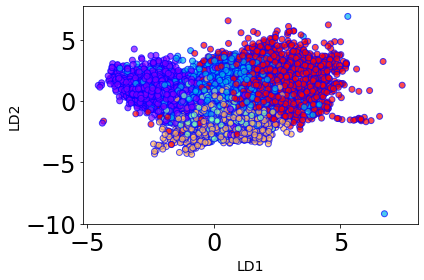

In [36]:
#graph the first two components to see how well the classes are being separated
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train_encoded,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

There seems to still be a lot of overlap between classes but it does seem like there is some decent separation. Let's add a third component to see if it helps and graph in 3d:

<Figure size 1152x720 with 0 Axes>

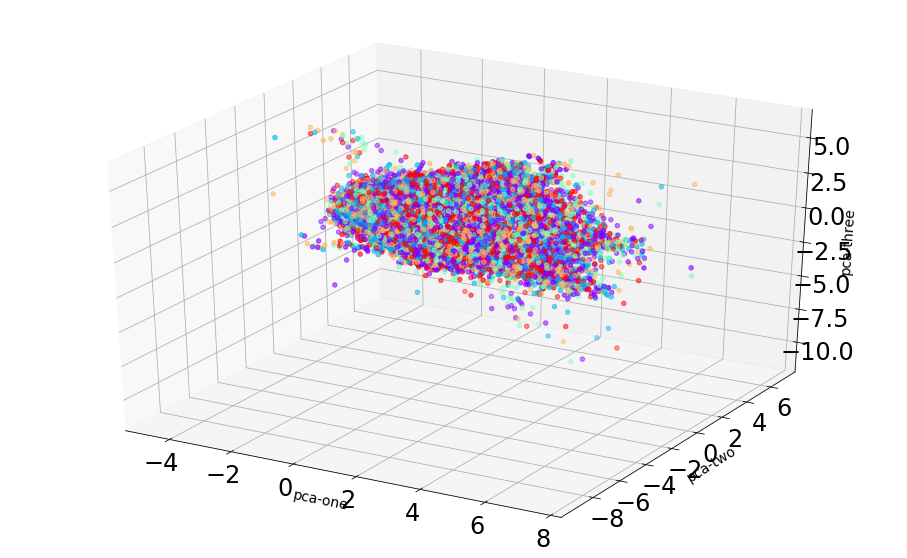

In [37]:
#see if graphing first three components leads to better separation
rndperm = np.random.permutation(X_lda_pd.shape[0])
plt.figure(figsize=(16,10))
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_lda_pd.loc[rndperm,:]["LDA1"], 
    ys=X_lda_pd.loc[rndperm,:]["LDA2"], 
    zs=X_lda_pd.loc[rndperm,:]["LDA3"], 
    c=y_train_encoded, 
    cmap='rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

The 3d graph does not look promising and it no longer seems like LDA is separating the classes very well. I proceed to check the LDA fit on the training set by looking at the confusion matrix as well as some typical classification metrics such as precision, recall, accuracy and f1 score:

In [38]:
#check fit on training set
pred=lda.predict(X_train_prepared)
print(confusion_matrix(pred, y_train_encoded))
print(classification_report(y_train_encoded, pred, digits=3))

[[8227 1064  583  343  249]
 [ 236 4373  631  232 1103]
 [ 806  811 4056  715  615]
 [ 740  268  746 4267  569]
 [  34  318  143  232 3956]]
              precision    recall  f1-score   support

           0      0.786     0.819     0.802     10043
           1      0.665     0.640     0.652      6834
           2      0.579     0.659     0.616      6159
           3      0.647     0.737     0.689      5789
           4      0.845     0.609     0.708      6492

    accuracy                          0.704     35317
   macro avg      0.705     0.693     0.694     35317
weighted avg      0.715     0.704     0.705     35317



An accuracy rate of 70% is a bit underwhelming and while LDA gave us a bit more information about our predictive features and provided some interesting visuals, it does not seem like a good model for this particular dataset. There is a more flexible version of LDA called Quadratic Discriminant Analysis that we could try next to improve our predictions. Instead I move on to some other non parametric machine learning methods that do not require meeting the stringent assumptions of LDA. I start with KNN and tune the number of neighbors hyperparameter using 3 fold cross validation:

In [39]:
#tune the number of neighbors hyperparameter
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [1,3,10,50,100]}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=3)
#fit model to data
knn_gscv.fit(X_train_prepared,y_train_prepared)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [41]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9973666928163701

I see that the optimal number of neighbors for this classifier is 1, meaning that we classify each new observation to its closest neighbor using Minkowski distance. The accuracy score is also very good at 99.7%. There is another type of distance we could use for KNN, called the mahalanobis distance, which can account for the covariance of predictors a bit better, unfortunately it requires a lot more computational power and is very slow to run. In an ideal scenario I would try that out as well, but given that the accuracy score is already high I move on to further evaluating the fitted KNN classifer on the training dataset.

In [42]:
#fit classifier on entire training set
# Create KNN classifier
knn_optimal = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn_optimal.fit(X_train_prepared,y_train_prepared)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
#fit mahalanobis KNN which accounts for collinearity between predictors with a covariance matrix (needs too much computation)
#from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
#knn = KNeighborsClassifier(n_neighbors = 1,metric='mahalanobis',
#                           metric_params={'V': np.cov(X_train_prepared,rowvar=False)})
# Fit the classifier to the data
#knn.fit(X_train_prepared,y_train)

In [44]:
#evaluate training data fit
y_pred = knn_optimal.predict(X_train_prepared)
print(confusion_matrix(y_pred, y_train_prepared))
print(classification_report(y_train_prepared, y_pred, digits=3))

[[10043     0     0     0     0]
 [    0  6834     0     0     0]
 [    0     0  6159     0     0]
 [    0     0     0  5789     0]
 [    0     0     0     0  6492]]
              precision    recall  f1-score   support

           A      1.000     1.000     1.000     10043
           B      1.000     1.000     1.000      6834
           C      1.000     1.000     1.000      6159
           D      1.000     1.000     1.000      5789
           E      1.000     1.000     1.000      6492

    accuracy                          1.000     35317
   macro avg      1.000     1.000     1.000     35317
weighted avg      1.000     1.000     1.000     35317



The confusion matrix has no errors and we have 100% across all the relevant metrics for every class. Hopefully this will generalize well to the test dataset. I also decide to fit a Random Forest model for comparison as well as to get a nice feature importance graph. I start with 3 fold cross validation tuning of a few hyperparameter values.

In [45]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 1000],
    'max_features': ['sqrt'],
    'min_samples_split': [10, 100],
    'n_estimators': [200, 1000]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_gscv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
#fit model to data
rf_gscv.fit(X_train_prepared,y_train_prepared)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  6.2min remaining:   33.8s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [46]:
#check top performing param values
rf_gscv.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 200}

In [47]:
#check mean score for the top performing param values
rf_gscv.best_score_

0.9975932454933804

Random Forest achieved an even higher accuracy value than KNN on the training set. I proceed to check if the parameter values I tuned are performing better than the default Random Forest:

In [48]:
#compare tuned parameters against default RF
#Create a Gaussian Classifier
rf_default=RandomForestClassifier()
rf_default.fit(X_train_prepared,y_train_prepared)
# check cross validation scores
cv_scores = cross_val_score(rf_default, X_train_prepared,y_train_prepared, cv=3)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.99770662 0.99770642 0.99898063]
cv_scores mean:0.9981312236205447


The default RF's mean accuracy was 99.52% compared to my tuned forest's accuracy of 99.75% therefore I go with the tuned forest instead and look at some additional evaluation metrics.

In [49]:
#fit optimal random forest classifier on entire training set
# Create RF classifier
rf_optimal = RandomForestClassifier(bootstrap=True,max_depth=1000,max_features= 'sqrt',min_samples_split= 10,
                                     n_estimators=1000)
# Fit the classifier to the data
rf_optimal.fit(X_train_prepared,y_train_prepared)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# prediction on train set
y_pred=rf_optimal.predict(X_train_prepared)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_prepared, y_pred))
print(confusion_matrix(y_pred, y_train_prepared))
print(classification_report(y_train_prepared, y_pred, digits=3))

Accuracy: 0.9999716850242093
[[10043     1     0     0     0]
 [    0  6833     0     0     0]
 [    0     0  6159     0     0]
 [    0     0     0  5789     0]
 [    0     0     0     0  6492]]
              precision    recall  f1-score   support

           A      1.000     1.000     1.000     10043
           B      1.000     1.000     1.000      6834
           C      1.000     1.000     1.000      6159
           D      1.000     1.000     1.000      5789
           E      1.000     1.000     1.000      6492

    accuracy                          1.000     35317
   macro avg      1.000     1.000     1.000     35317
weighted avg      1.000     1.000     1.000     35317



Unlike KNN which had a perfect confusion matrix, RF misclassified 1 observation. Still, it looks like a strong candidate model. I take a look at the features it deemed most important:

In [51]:
import pandas as pd
feature_imp = pd.Series(rf_optimal.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

roll_belt               0.082134
yaw_belt                0.063087
pitch_forearm           0.051714
magnet_dumbbell_z       0.051140
pitch_belt              0.047080
magnet_dumbbell_y       0.043556
roll_forearm            0.039246
magnet_dumbbell_x       0.032072
accel_belt_z            0.026821
roll_dumbbell           0.026507
accel_dumbbell_y        0.025777
magnet_belt_z           0.024874
magnet_belt_y           0.023997
roll_arm                0.021186
accel_dumbbell_z        0.020716
accel_forearm_x         0.020156
gyros_belt_z            0.019873
magnet_forearm_z        0.018206
total_accel_dumbbell    0.017410
yaw_arm                 0.016861
magnet_arm_x            0.016432
accel_forearm_z         0.015815
yaw_dumbbell            0.015761
magnet_belt_x           0.015726
accel_dumbbell_x        0.015566
gyros_dumbbell_y        0.015431
accel_arm_x             0.014640
magnet_arm_y            0.014394
total_accel_belt        0.014330
magnet_forearm_x        0.014102
magnet_for

No handles with labels found to put in legend.


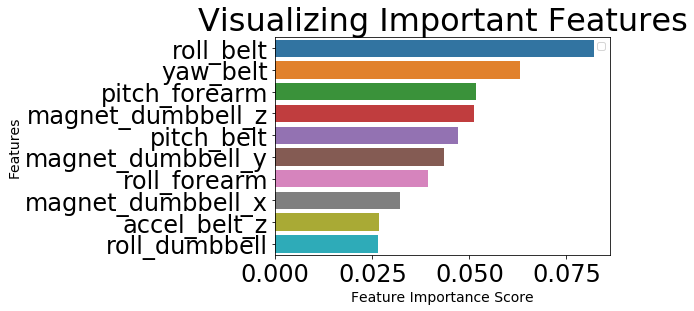

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[0:10], y=feature_imp.index[0:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

As we've seen before during EDA and LDA, it looks like the roll_belt and yaw_belt are the most important features in predicting class separation. It is good to see multiple methods agree with each other as a sanity check. Next, I evaluate the models on the test data sets after preprocessing the X_test matrix using the values from the X_train preprocessing fit.

In [53]:
#prepare test set X matrix
X_test_imputed=imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed,columns=X_test.columns)
X_test_prepared = preprocessor.fit_transform(X_test)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=X_test.columns)

In [54]:
#prepare test y
y_test_prepared = pd.DataFrame(y_test, columns=['target'])

I evaluate the KNN model first:

In [58]:
#evaluate KNN
y_test_pred = knn_optimal.predict(X_test_prepared)
print(confusion_matrix(y_test_pred, y_test_prepared))
print(classification_report(y_test_prepared, y_test_pred, digits=3))

[[1114    1    0    0    0]
 [   2  758    0    0    0]
 [   0    0  684    0    0]
 [   0    0    1  642    0]
 [   0    0    0    1  722]]
              precision    recall  f1-score   support

           A      0.999     0.998     0.999      1116
           B      0.997     0.999     0.998       759
           C      1.000     0.999     0.999       685
           D      0.998     0.998     0.998       643
           E      0.999     1.000     0.999       722

    accuracy                          0.999      3925
   macro avg      0.999     0.999     0.999      3925
weighted avg      0.999     0.999     0.999      3925



Once again, we see a great result with 99% across all classes and metrics with only 5 test observations misclassified in the off diagonal of the confusion  matrix. I evaluate the RF model on the test set next:

In [57]:
#evaluate RF
y_test_pred = rf_optimal.predict(X_test_prepared)
print(confusion_matrix(y_test_pred, y_test_prepared))
print(classification_report(y_test_prepared, y_test_pred, digits=3))

[[1116   22    6   43    0]
 [   0  737   15    0    0]
 [   0    0  663   14    0]
 [   0    0    1  584    3]
 [   0    0    0    2  719]]
              precision    recall  f1-score   support

           A      0.940     1.000     0.969      1116
           B      0.980     0.971     0.976       759
           C      0.979     0.968     0.974       685
           D      0.993     0.908     0.949       643
           E      0.997     0.996     0.997       722

    accuracy                          0.973      3925
   macro avg      0.978     0.969     0.973      3925
weighted avg      0.974     0.973     0.973      3925



The random forest model performs reasonably well but not as well as KNN. It seems like the Random Forest model overfit the training data since it did not generalize to the test data as well as I hoped. It achieved reasonable scores but not nearly as good as KNN's scores. In conclusion, while a Random Forest model provides us with a little more insight into feature importance, for purely predictive purposes, KNN looks to be superior for this particular dataset.

In [65]:
#check size of KNN
import pickle
import sys

p = pickle.dumps(knn_optimal)
print(sys.getsizeof(p))

32175519


In [84]:
#check speed of prediction KNN
import time 
start_time = time.time() 
y_test_pred = knn_optimal.predict(X_test_prepared[0:1]) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.002983570098876953 seconds ---


In [67]:
#check size of RF
import pickle
import sys

p = pickle.dumps(rf_optimal)
print(sys.getsizeof(p))

173181061


In [90]:
#check speed of prediction RF
import time 
start_time = time.time() 
y_test_pred = rf_optimal.predict(X_test_prepared[0:1]) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.08380866050720215 seconds ---
